<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC)_

---

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [3]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [4]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

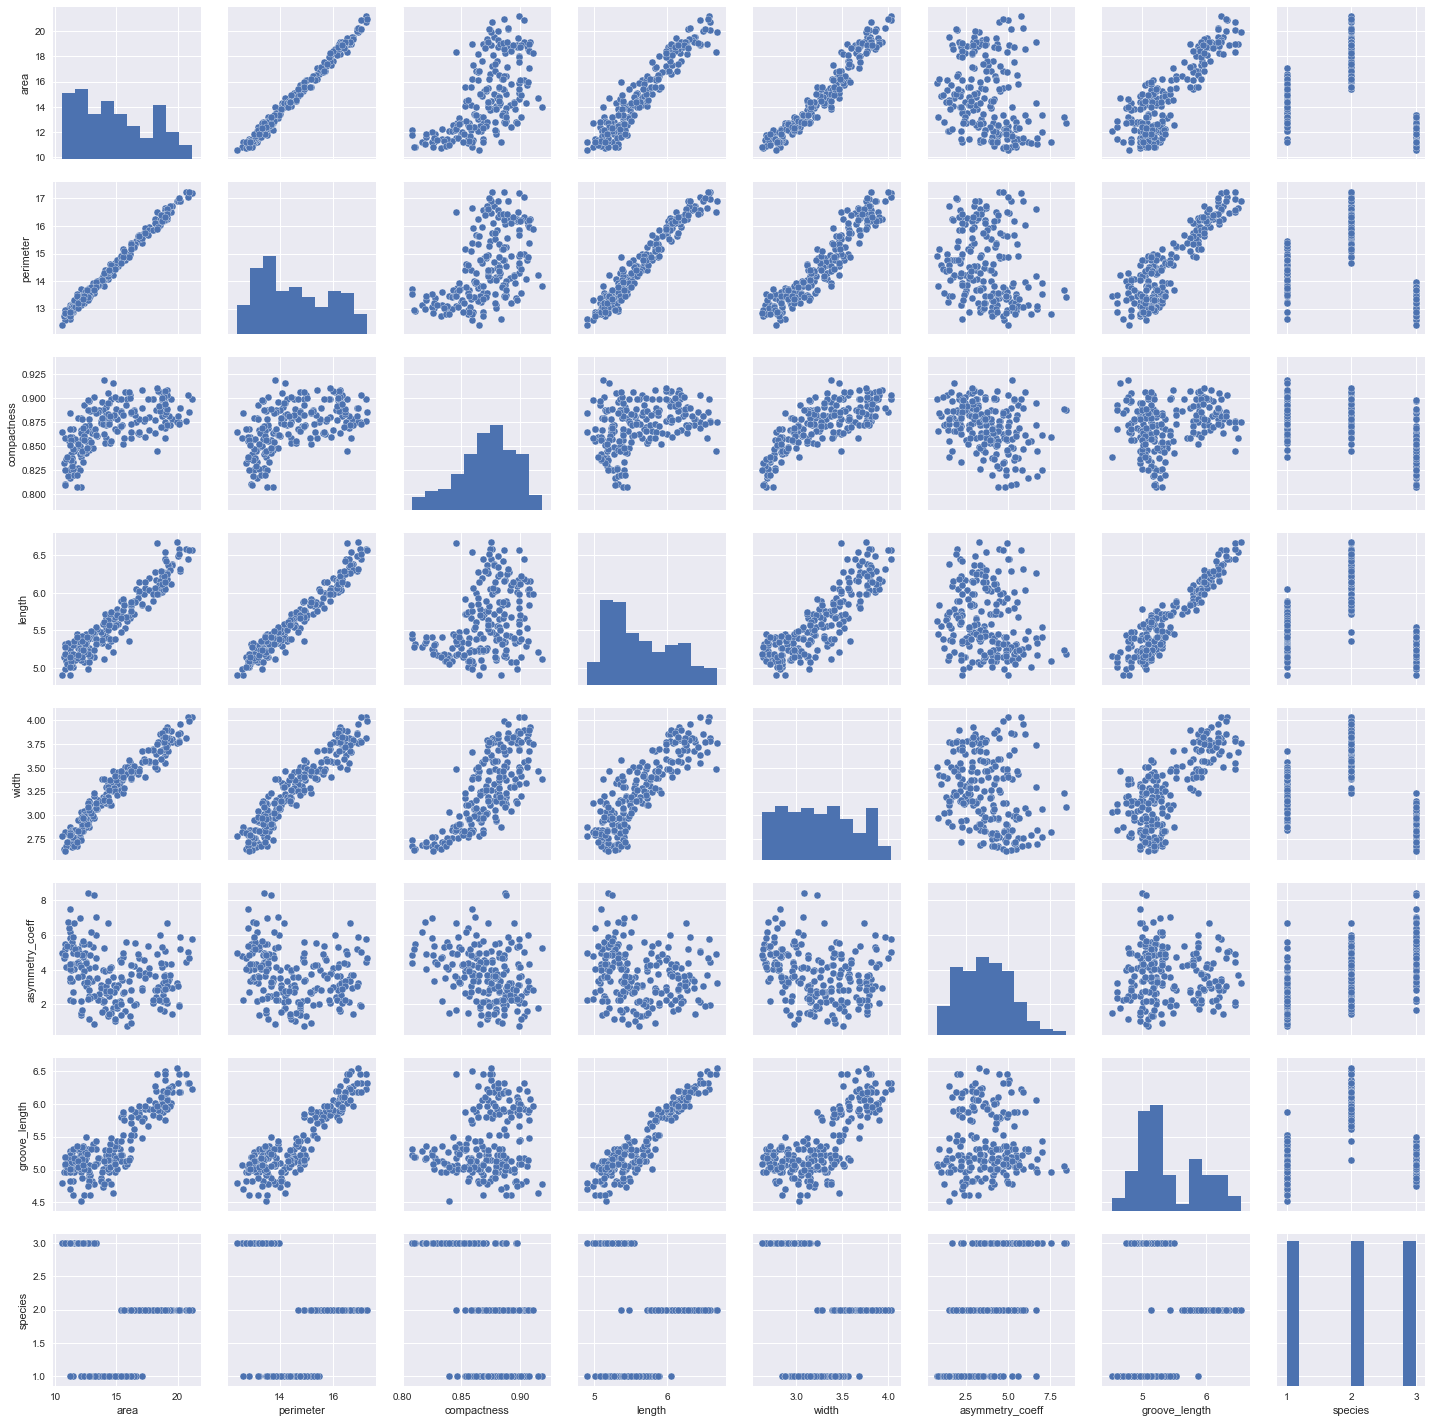

In [5]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot without the "species" hue.
sns.pairplot(seeds)

In [6]:
# Check for nulls
seeds.isnull().sum()
# there is a value for every position in the DF

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

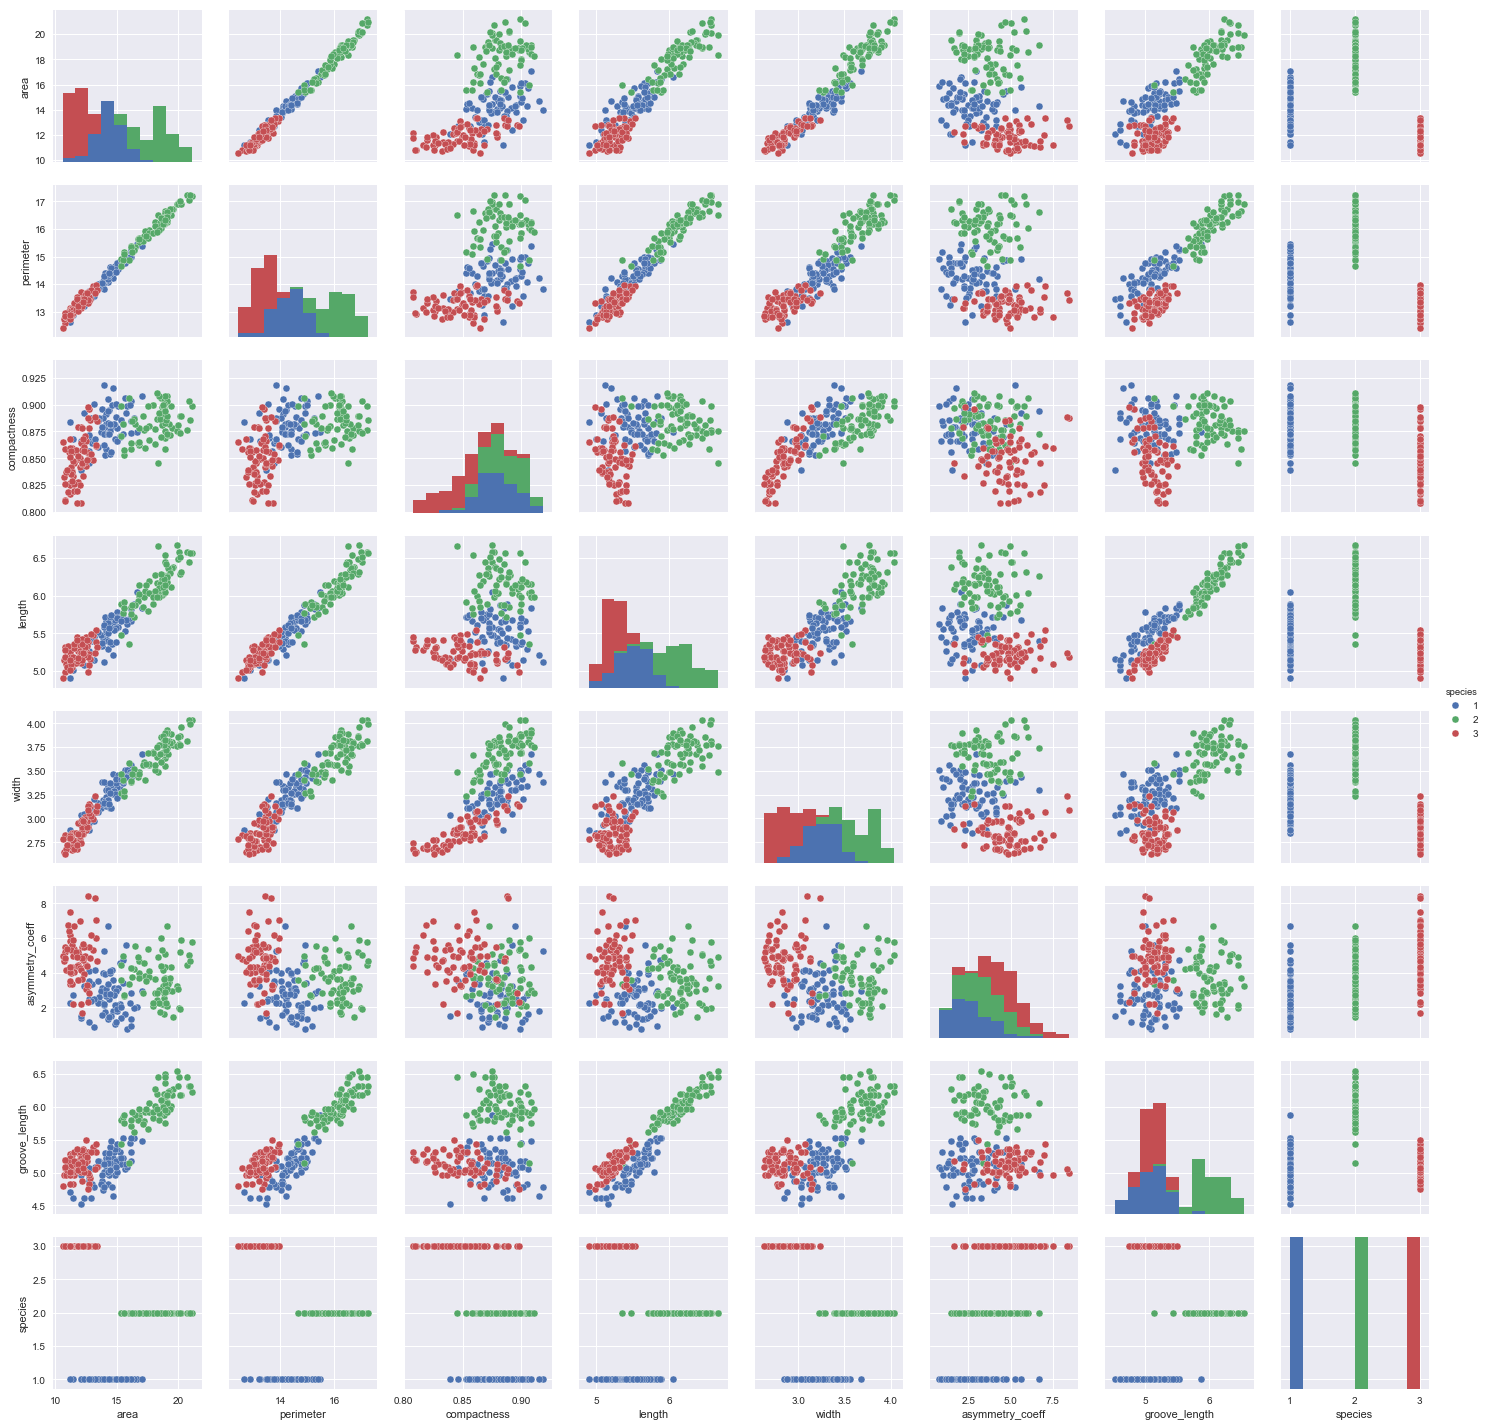

In [7]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [8]:
seeds.species.value_counts()
# all classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [9]:
# Check datatypes
seeds.dtypes
# We got an odd-ball, that species guy.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [10]:
# drop 'species', which is currently acting as a target (categorical)
X = seeds.drop('species', axis = 1)
y = seeds.species

In [11]:
# Scale the data
from sklearn.preprocessing import normalize

Xn = normalize(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. Lets try using 2, 4 and 6 cluster splits. Run the clustering algorithm with each of those k values.

In [12]:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for the models

In [15]:
# Labels and centroids for 2 Clusters
labels_2 = k_mean2.labels_
print labels_2
clusters_2 = k_mean2.cluster_centers_
clusters_2

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


array([[ 0.59452087,  0.65538982,  0.04178222,  0.2581907 ,  0.14176089,
         0.24787804,  0.25185439],
       [ 0.66929175,  0.63185432,  0.03700914,  0.24244146,  0.14335061,
         0.12355609,  0.2308226 ]])

In [16]:
# Labels and centroids for 4 Clusters

labels_4 = k_mean4.labels_
print labels_4
clusters_4 = k_mean4.cluster_centers_
clusters_4

[0 0 3 3 0 0 3 3 0 0 2 0 3 3 3 2 1 0 0 3 3 3 0 3 0 0 3 3 3 3 0 3 3 3 0 0 0
 0 3 1 3 3 3 2 3 0 0 3 3 0 3 2 3 3 0 0 3 0 0 3 3 3 3 3 0 3 0 3 0 3 2 2 2 0
 2 2 2 2 2 0 2 2 2 0 0 0 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0
 2 0 2 2 0 2 0 2 0 2 2 2 0 2 2 2 0 0 2 0 0 2 2 2 2 2 0 0 2 1 1 1 1 1 1 3 1
 3 1 1 1 1 3 1 1 3 1 1 1 3 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 3 1]


array([[ 0.68364239,  0.62612096,  0.03584028,  0.23952297,  0.14266939,
         0.08734826,  0.22865892],
       [ 0.58749248,  0.65603307,  0.04202818,  0.2591535 ,  0.14127454,
         0.26205395,  0.25328319],
       [ 0.68246421,  0.6127239 ,  0.03410852,  0.23350594,  0.13945332,
         0.17492916,  0.22699804],
       [ 0.62914261,  0.65937803,  0.04169991,  0.25621136,  0.14726131,
         0.14335932,  0.24070471]])

In [17]:
# Labels and centroids for 6 Clusters

labels_6 = k_mean6.labels_
print labels_6
clusters_6 = k_mean6.cluster_centers_
clusters_6

[0 0 5 0 0 5 5 5 0 0 3 0 5 5 5 3 3 0 0 2 5 5 0 0 0 0 5 5 5 5 0 5 5 0 0 4 4
 4 5 1 5 5 5 3 5 0 0 5 5 0 5 3 5 5 0 0 5 0 0 0 5 5 5 2 0 5 0 0 0 5 3 3 3 4
 3 3 3 3 3 4 3 3 3 4 4 4 4 4 3 3 4 4 4 3 3 3 4 4 4 4 3 4 3 4 4 4 4 3 4 4 4
 4 4 3 3 4 3 4 4 4 3 4 3 4 3 3 3 4 4 3 4 4 3 3 3 3 4 5 5 3 2 1 1 1 2 1 5 2
 5 1 1 1 2 2 2 1 2 2 2 1 5 2 2 2 1 5 2 2 2 2 1 1 2 1 1 2 1 2 1 0 2 2 2 1 1
 2 2 2 1 1 1 2 2 2 2 2 1 2 5 5 1 5 2 1 2 2 2 1 2 1]


array([[ 0.65564274,  0.65102356,  0.03965859,  0.25101767,  0.14725162,
         0.07292262,  0.23151032],
       [ 0.58103634,  0.64887422,  0.04164516,  0.25662585,  0.14038139,
         0.29776646,  0.25140233],
       [ 0.59486369,  0.66462663,  0.04258345,  0.26228593,  0.14265269,
         0.21697793,  0.25570719],
       [ 0.67982692,  0.61360367,  0.03448039,  0.23343219,  0.14011417,
         0.18176598,  0.22668659],
       [ 0.70001446,  0.61016572,  0.03334147,  0.23258029,  0.13964832,
         0.10308825,  0.22720287],
       [ 0.63755305,  0.65505229,  0.04102218,  0.25367881,  0.14695966,
         0.13873912,  0.23749169]])

### 6. Compute the Silhouette Score to evaluate your clustering models

Silhouette score ranges from -1 to 1, with 1 being the best.

In [18]:
from sklearn.metrics import silhouette_score

In [20]:
# A Silhouette of 0.5 is not bad considering the range for scores is -1 to 1.
silhouette_score(Xn, labels_2)

0.50144852045607879

In [21]:
# Double our clusters saw a pretty large drop in silhouette score.
silhouette_score(Xn, labels_4)

0.38019624571437016

In [23]:
# A further addition of 2 clsuters dropped out score again but by as much.
silhouette_score(Xn, labels_6)

0.36163480499215728

### 7. Plot `length` vs. `groove_length` using the clusters from each model.

Each time, compare to the actual species classification.


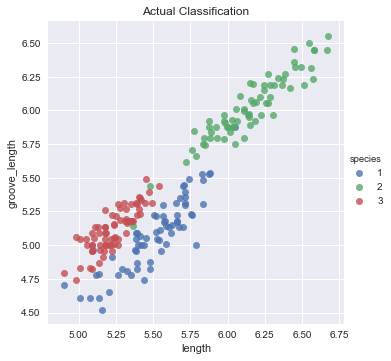

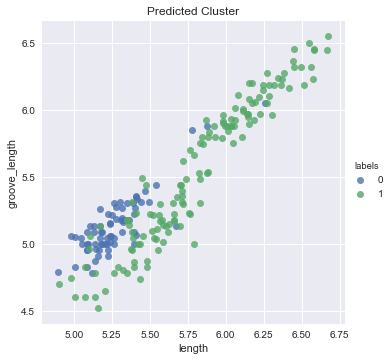

In [27]:
#length x groove_length
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')

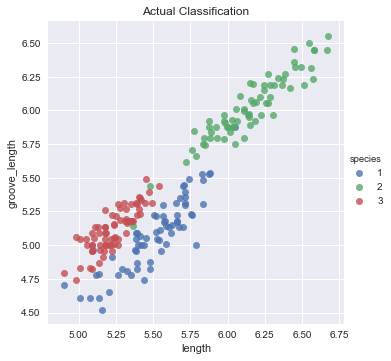

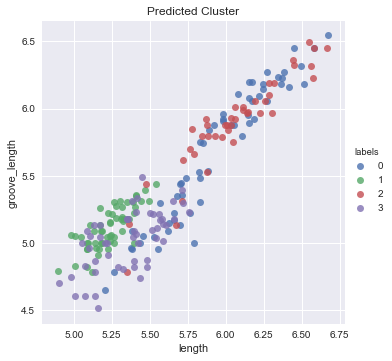

In [28]:
seeds4 = seeds
seeds4['labels'] = labels_4

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

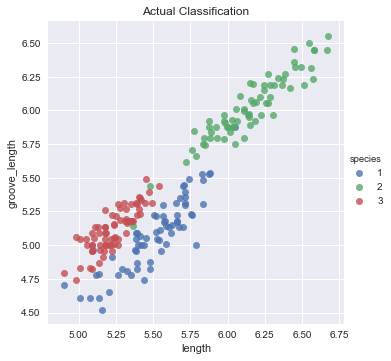

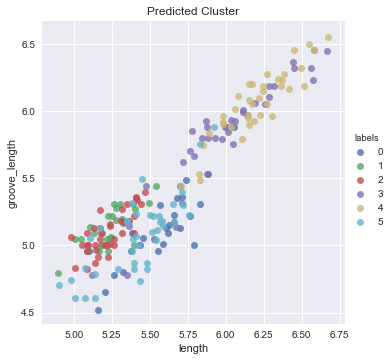

In [29]:
seeds6 = seeds
seeds6['labels'] = labels_6

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

### 8. Evaluate a K-Means model with `k=3` clusters.

1. Construct the model.
- Print the labels and centroids.
- Evaluate the model with silhouette score.
- Plot `length` vs. `groove_length` and compare the clusters to the actual species.

In [30]:
k_mean3 = KMeans(n_clusters=3)
k_mean3.fit(Xn)

labels_3 = k_mean3.labels_
print labels_3
clusters_3 = k_mean3.cluster_centers_
clusters_3

[1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 2 1 1 2 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 2 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 2 2 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 1 2 2 2 0 2 2 2 2]


array([[ 0.66509806,  0.62750951,  0.03646614,  0.24114117,  0.1415701 ,
         0.16937951,  0.23066162],
       [ 0.67054001,  0.63555118,  0.03754245,  0.24369327,  0.14465753,
         0.09404806,  0.2312844 ],
       [ 0.5890222 ,  0.65769788,  0.04218078,  0.25964956,  0.14174127,
         0.25228245,  0.25373376]])

In [32]:
silhouette_score(Xn, labels_3)

0.36029385561045912

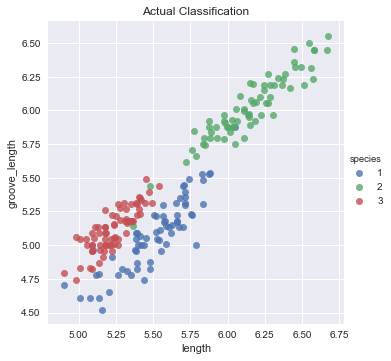

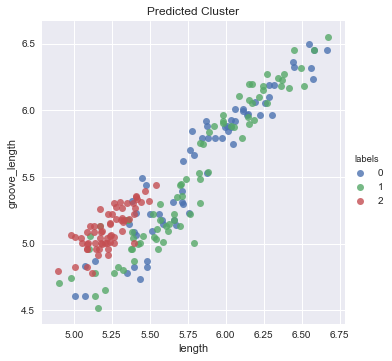

In [33]:
seeds3 = seeds
seeds3['labels']=labels_3

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')